In [1]:
import pandas as pd 

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
# Basic info
print("Shape pf dataseet:", df.shape)
print("\nFirst 5 rows of dataset:")
print(df.head())


Shape pf dataseet: (284807, 31)

First 5 rows of dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.13745

In [4]:
# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


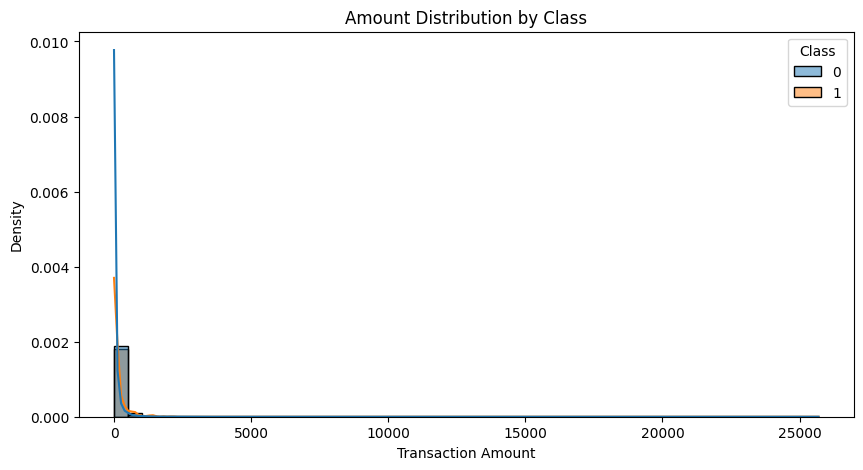

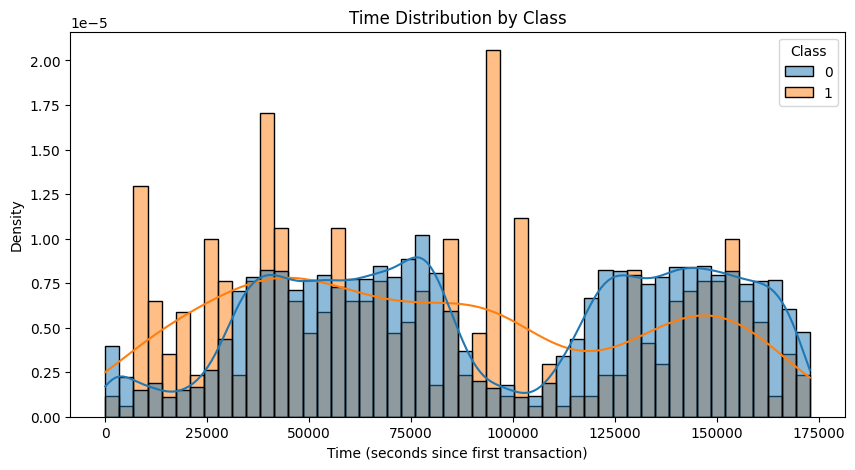

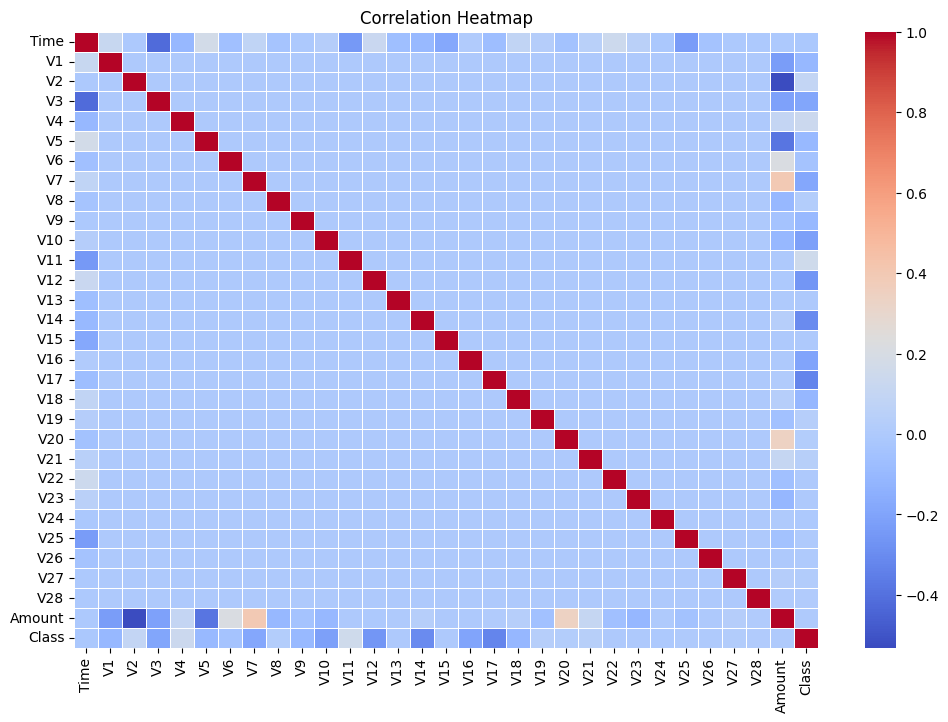

In [7]:
# code for Visual EDA

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Amount distribution by class
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, kde=True, stat="density", common_norm=False)
plt.title('Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

# 2. Time distribution by class
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Time', hue='Class', bins=50, kde=True, stat="density", common_norm=False)
plt.title('Time Distribution by Class')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Density')
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [8]:
# code for Preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create copies of the original
df_copy = df.copy()

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df_copy['Amount_Scaled'] = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
df_copy['Time_Scaled'] = scaler.fit_transform(df_copy['Time'].values.reshape(-1, 1))

# Drop original 'Amount' and 'Time'
df_copy.drop(['Amount', 'Time'], axis=1, inplace=True)

# Set features and labels
X = df_copy.drop('Class', axis=1)
y = df_copy['Class']

# Split into train and test sets (stratify maintains class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f'Training set size: {X_train.shape}, Test set size: {X_test.shape}')


Training set size: (227845, 30), Test set size: (56962, 30)


In [9]:
# code to Apply SMOTE

from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f'Before SMOTE: {y_train.value_counts()}')
print(f'After SMOTE: {y_train_sm.value_counts()}')


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [10]:
# code to Train and Evaluate a Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest on SMOTE-balanced data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_sm, y_train_sm)

# Make predictions on original test set
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))



[[56846    18]
 [   19    79]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8144    0.8061    0.8103        98

    accuracy                         0.9994     56962
   macro avg     0.9070    0.9029    0.9050     56962
weighted avg     0.9993    0.9994    0.9993     56962



In [12]:
import pickle
features = df.drop('Class', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Save scaler and model
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
